# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Henry Dwi Prana Sitepu
- **Email:** henrystp05@gmail.com
- **ID Dicoding:** MC319D5Y2229

## Menentukan Pertanyaan Bisnis

- Bulan apa rental sepeda paling sedikit dalam 2 tahun terakhir?
- Bagaimana pengaruh musim terhadap penggunaan bike sharing?
- kapan rental sepeda terbanyak terjadi dalam satu hari?
- Bagaimana Proporsi Peminjaman sepeda pada saat hari libur ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv : menghitung dataset bike sharing berdasarkan harian
- hour.csv : menghitung dataset bike sharing berdasarkan jam:

### Assessing Data

**day.csv**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()
#memeriksa missing value pada semua kolom day_df, hasilnya no missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.duplicated().sum()
#memeriksa nilai duplikat pada day dataframe, hasilnya no duplicated

0

In [ ]:
day_df.describe()
#melihat persebaran nilai pada day dataframe

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**hour.csv**

In [ ]:
hour_df.describe()
#melihat persebaran value pada hour_df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.info()
#memeriksa missing value,output menunjukkan bahwa semua nilai pada setiap kolom berjumlah sama sehingga dapat dikatakan no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.duplicated().sum()
#memeriksa nilai duplikat dan hasilnya adalah 0

0

**Insight:**
1. day_df :

*   No Missing Value (semua kolom berjumlah 731 value)
*   No Duplicated Data
*   Terdapat Kesalahan tipe data pada kolom : dteday
*   tidak terdapat Inaccurate Value

2. hour_df

*   No Missing Value (semua kolom berjumlah 17379 value)
*   No Duplicated Data
*   Terdapat Kesalahan tipe data pada kolom : dteday
*   tidak terdapat innacurate value









### Cleaning Data

**Mengatasi Tipe Data**

In [ ]:
#mengubah kolom dteday dengan tipe data datetime di kedua dataframe
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom order_date & delivery_date menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

**day_df**

In [ ]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


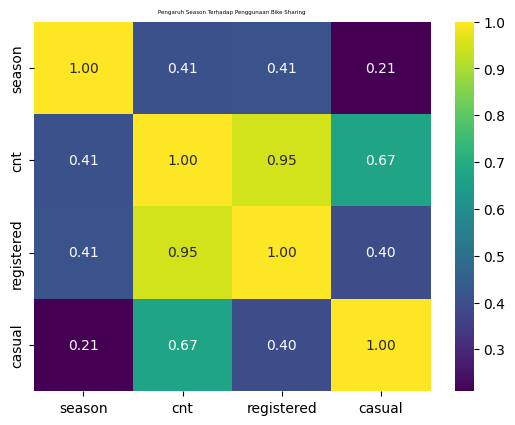

In [ ]:
corr_column = day_df[["season","cnt","registered","casual"]]
sns.heatmap(corr_column.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Pengaruh Season Terhadap Penggunaan Bike Sharing", fontsize=4)
plt.show()

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
day_df["mnth"] = day_df["mnth"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})

In [ ]:
day_df["season"] = day_df["season"].map({
    1:"Spring",
    2:"Summer",
    3:"Fall",
    4:"Winter"
})

In [ ]:
hasil_bulan = day_df.groupby(by="mnth").agg({
    "cnt":"sum",
    "casual":"sum",
    "registered":"sum"
}).sort_values(by="cnt",ascending=True)

In [ ]:
hasil_bulan

,cnt,casual,registered
mnth,,,
Jan,134933,12042,122891
Feb,151352,14963,136389
Dec,211036,21693,189343
Mar,228920,44444,184476
Nov,254831,36603,218228
Apr,269094,60802,208292
Oct,322352,59760,262592
May,331686,75285,256401
Jul,344948,78157,266791


In [ ]:
filtered_yr_1= day_df[day_df["yr"]==1]
hasil_bulan_1 = filtered_yr_1.groupby(by=["mnth","yr"]).agg({
    "cnt":"sum",
    "casual":"sum",
    "registered":"sum"
}).sort_values(by="cnt",ascending=True)

In [ ]:
filtered_yr_0= day_df[day_df["yr"]==0]
hasil_bulan_0 = filtered_yr_0.groupby(by=["mnth","yr"]).agg({
    "cnt":"sum",
    "casual":"sum",
    "registered":"sum"
}).sort_values(by="cnt",ascending=True)

In [ ]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

,cnt
yr,
1,2049576
0,1243103


In [ ]:
season_result = day_df.groupby(by="season").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":["sum","min","max","mean"]
})
season_result = season_result.sort_values(by=("cnt","sum"),ascending=False)
season_result

casual registered      cnt                         
           sum        sum      sum   min   max         mean
season                                                     
Fall    226091     835038  1061129  1115  8714  5644.303191
Summer  203522     715067   918589   795  8362  4992.331522
Winter  129782     711831   841613    22  8555  4728.162921
Spring   60622     410726   471348   431  7836  2604.132597

In [ ]:
day_df.groupby(by=["season","mnth"]).agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":["sum","min","max","mean"]
})

casual registered     cnt                         
               sum        sum     sum   min   max         mean
season mnth                                                   
Fall   Aug   72039     279155  351194  1115  7865  5664.419355
       Jul   78157     266791  344948  3285  8173  5563.677419
       Jun   23761      91627  115388  4507  7458  5769.400000
       Sep   52134     197465  249599  1842  8714  5672.704545
Spring Dec    6463      36535   42998   441  3623  1954.454545
       Feb   14963     136389  151352  1005  5062  2655.298246
       Jan   12042     122891  134933   431  4521  2176.338710
       Mar   27154     114911  142065   605  7836  3551.625000
Summer Apr   60802     208292  269094   795  7460  4484.900000
       Jun   50145     180809  230954  3767  8120  5773.850000
       Mar   17290      69565   86855  1536  8362  3947.954545
       May   75285     256401  331686  2633  8294  5349.774194
Winter Dec   15230     152808  168038   705  6606  4200.950000
       Nov   36603     218228  254831  1495  6852  4247.183333
       Oct   59760     262592  322352    22  8156  5199.225806
       Sep   18189      78203   96392  2395  8555  6024.500000

In [ ]:
day_df["holiday"] = day_df["holiday"].map({
    0:"Workday",
    1:"Holiday"
})

In [ ]:
holiday_result = day_df.groupby(by="holiday").agg({
    "cnt":"sum"
})
holiday_result = holiday_result.sort_values(by="cnt",ascending=False)
holiday_result

,cnt
holiday,
Workday,3214244
Holiday,78435


hour_df

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_result =hour_df.groupby(by=["hr"]).agg({
    "cnt":"sum",
    "casual":"sum",
    "registered":"sum"
}).sort_values(by="cnt",ascending=False)

In [ ]:
hour_df.groupby(by=["hr","mnth"]).agg({
    "cnt":"sum",
    "casual":"sum",
    "registered":"sum"
}).sort_values(by="cnt",ascending=False)

cnt  casual  registered
hr mnth                           
17 8     36675    6073       30602
   9     35774    6583       29191
   6     35347    6494       28853
18 8     35103    5750       29353
17 10    34863    5764       29099
...        ...     ...         ...
3  2       308      48         260
4  4       289      62         227
   3       228      57         171
   1       162      15         147
   2       111      11         100

[288 rows x 3 columns]

**Insight:**
- Data Menghasilkan nilai pengguna terdaftar selalu lebih banyak dari pengguna casual
- Bulan Januari menjadi bulan pengguna paling sedikit selama dua tahun terakhir
- Rental sepeda terbanyak terjadi di bulan Agustus & dan jam terbanyak terjadi di pukul 17.00
- Musim dengan punya pengguna terbanyak terjadi di musim Fall - Summer - Winter - Spring(tertinggi ke terendah), musim memiliki hubungan yang searah dengan cnt(banyak user) dengan nilai 0,4
- Pengguna lebih banyak terjadi pada saat workday dibanding dengan holiday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bulan apa rental sepeda paling sedikit dalam 2 tahun terakhir?

In [ ]:
hasil_bulan

,cnt,casual,registered
mnth,,,
Jan,134933,12042,122891
Feb,151352,14963,136389
Dec,211036,21693,189343
Mar,228920,44444,184476
Nov,254831,36603,218228
Apr,269094,60802,208292
Oct,322352,59760,262592
May,331686,75285,256401
Jul,344948,78157,266791


<ipython-input-76-43abfdde977c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=hasil_bulan_0, palette=colors, ax=ax[0])
<ipython-input-76-43abfdde977c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=hasil_bulan_1, palette=colors, ax=ax[1])


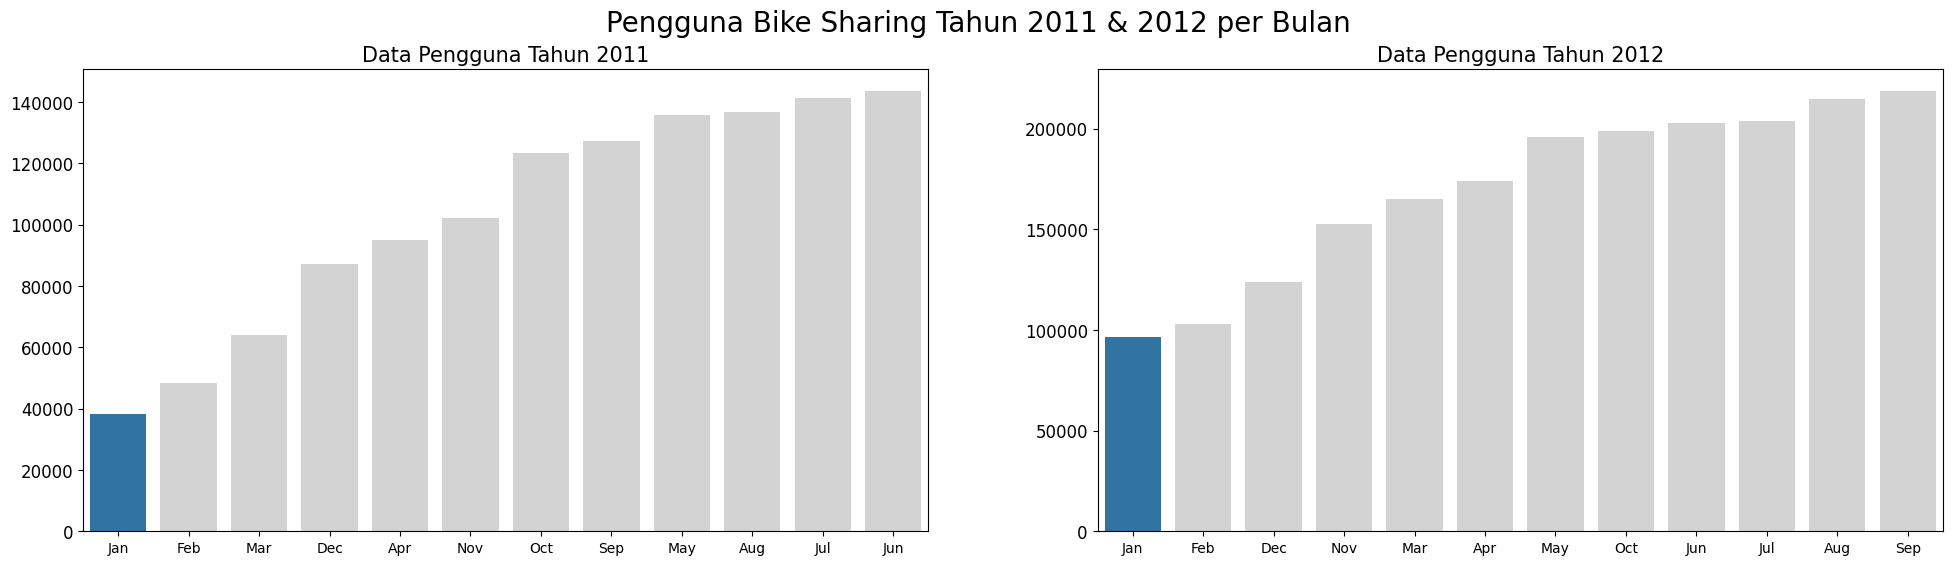

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#1f77b4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3" ]

sns.barplot(x="mnth", y="cnt", data=hasil_bulan_0, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Data Pengguna Tahun 2011", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)


sns.barplot(x="mnth", y="cnt", data=hasil_bulan_1, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Data Pengguna Tahun 2012", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Pengguna Bike Sharing Tahun 2011 & 2012 per Bulan ", fontsize=20)
plt.show()


### Pertanyaan 2:Bagaimana Pengaruh Season Terhadap Penggunaan Bike Sharing

In [ ]:
season_result

casual registered      cnt                         
           sum        sum      sum   min   max         mean
season                                                     
Fall    226091     835038  1061129  1115  8714  5644.303191
Summer  203522     715067   918589   795  8362  4992.331522
Winter  129782     711831   841613    22  8555  4728.162921
Spring   60622     410726   471348   431  7836  2604.132597

In [ ]:
day_df["season"] = day_df["season"].map({
    "Spring":1,
    "Summer":2,
    "Fall":3,
    "Winter":4
})

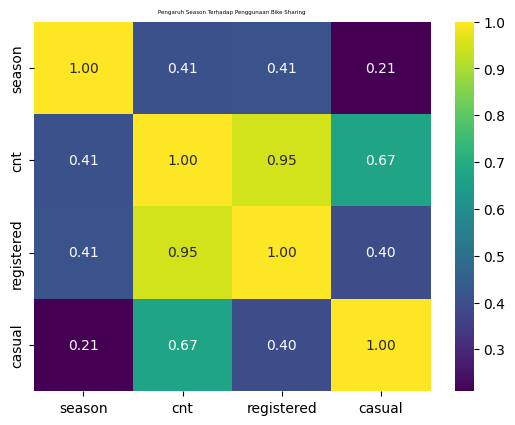

In [ ]:
corr_column = day_df[["season","cnt","registered","casual"]]
sns.heatmap(corr_column.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Pengaruh Season Terhadap Penggunaan Bike Sharing", fontsize=4)
plt.show()

In [ ]:
day_df["season"] = day_df["season"].map({
    1:"Spring",
    2:"Summer",
    3:"Fall",
    4:"Winter"
})

In [ ]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)


,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


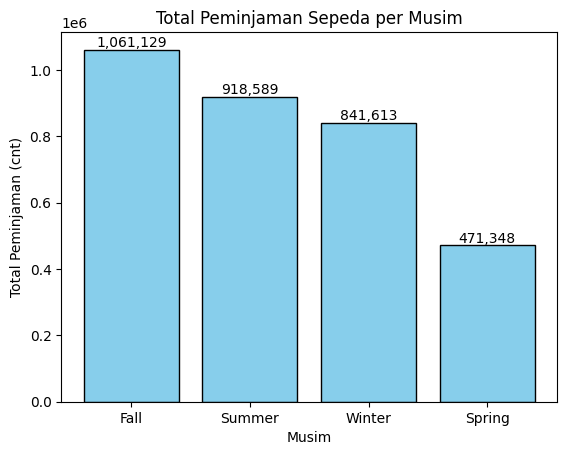

In [ ]:
season_cnt = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

plt.bar(season_cnt.index, season_cnt.values, color='skyblue', edgecolor='black')

plt.title("Total Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman (cnt)")

for i, value in enumerate(season_cnt.values):
    plt.text(i, value + 50, f"{value:,}", ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
season_cnt = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)
print(season_cnt)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64


###Pertanyaan 3 : Kapan Rental sepeda terbanyak terjadi dalam satu hari?

<ipython-input-84-bc2e900053fb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="hr", y="cnt", data=hour_result, palette="viridis")


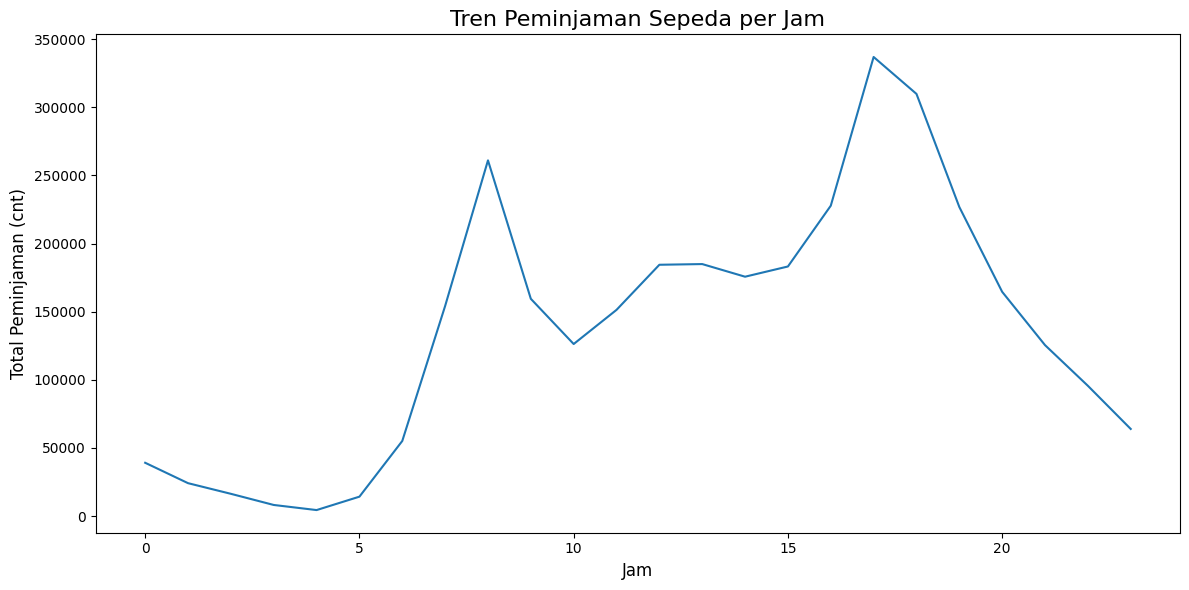

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_result, palette="viridis")

plt.title("Tren Peminjaman Sepeda per Jam", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Peminjaman (cnt)", fontsize=12)


plt.tight_layout()
plt.show()

###Pertanyaan 4: Bagaimana Proporsi Peminjaman sepeda pada saat hari libur ?

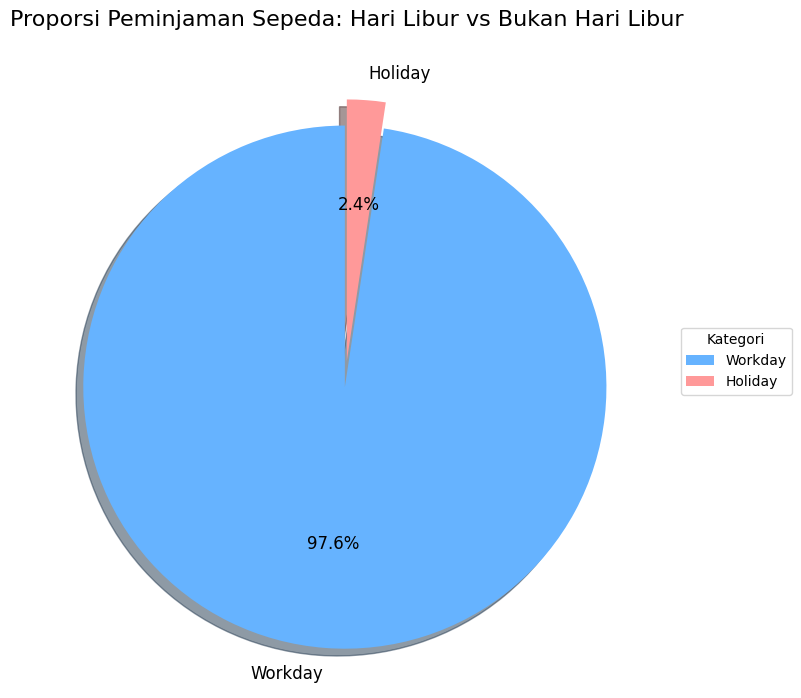

In [ ]:
labels = ['Workday', 'Holiday']
sizes = holiday_result["cnt"]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)


plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, textprops={'fontsize': 12})

plt.legend(wedges, labels, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Proporsi Peminjaman Sepeda: Hari Libur vs Bukan Hari Libur", fontsize=16)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan Data tersebut user jauh lebih suka menggunakan bike sharing ini pada saat workday daripada holiday.kita bisa berasumsi bahwauser menggunakan sepeda untuk bekerja
- Musim memiliki pengaruh pada penggunakan bike sharing,user jauh lebih suka menggunakan bike sharing saat musim dengan suhu hangat

## Analisis Lanjutan (Opsional)

In [ ]:
mean_season = day_df.groupby("season").temp.mean().sort_values(ascending=False)
mean_season

,temp
season,
Fall,0.706309
Summer,0.544405
Winter,0.422906
Spring,0.297748


In [ ]:


def custom_binning(value):
    if value <= 0.29:
        return "suhu tidak baik"
    elif value <= 0.42:
        return "suhu kurang baik"
    elif value <= 0.54:
        return "suhu cukup bagus"
    else:
        return "suhu disarankan"

day_df["bike_sharing"] = day_df["temp"].apply(custom_binning)

print(day_df)

     instant     dteday  season  yr mnth  holiday  weekday  workingday  \
0          1 2011-01-01  Spring   0  Jan  Workday        6           0   
1          2 2011-01-02  Spring   0  Jan  Workday        0           0   
2          3 2011-01-03  Spring   0  Jan  Workday        1           1   
3          4 2011-01-04  Spring   0  Jan  Workday        2           1   
4          5 2011-01-05  Spring   0  Jan  Workday        3           1   
..       ...        ...     ...  ..  ...      ...      ...         ...   
726      727 2012-12-27  Spring   1  Dec  Workday        4           1   
727      728 2012-12-28  Spring   1  Dec  Workday        5           1   
728      729 2012-12-29  Spring   1  Dec  Workday        6           0   
729      730 2012-12-30  Spring   1  Dec  Workday        0           0   
730      731 2012-12-31  Spring   1  Dec  Workday        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.36

1. binning ini dapat membantu kita untuk melakukan keputusan melakukan bike sharing atau tidak berdasarkan rata - rata suhu dari season,dan dapat dilihat pada visualisasi suhu yang paling diminati yaitu suhu musim fall dengan rata rata 0.7(dinormalisasikan)

2. membantu kita mengetahui mengapa pengguna lebih menyukai musim fall daripada yang lainnya berdasarkan suhu

## Conclusion

- Bulan Januari secara berturut menjadi bulan yang paling sedikit menyumbang angka pengguna bike sharing pada tahun 2011 & 2012

- Suhu pada season mempengaruhi jumlah pengguna bike sharing dapat dilihat bahwa fall dan summer menjadi musim yang paling diminati dengan suhu rata - rata masing masing 28 derajat celcius dan 20 derajat celcius

- rental terbanyak terjadi pada pukul 17 dalam satu hari

- bike sharing ternyata bukan jadi opsi pada saat hari libur, sehingga dapat diasumsikan penggunaan sepeda lebih ke arah bekerja,akademic, dan dll.